## Part 2 More advance coloring agent

## Part 2a Little bit improved agent.

### Improved agent based mention below paper "Colorful Image Colorization Richard Zhang, Phillip Isola, Alexei A. Efros" . For this we design a small CNN. It is trained on 1st half of Image and tested on seconf half of the image 

In [150]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.layers import Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [151]:
# Reading Image
completeImage = img_to_array(load_img('resizeimage.jpg'))
completeImageArray = np.array(completeImage, dtype=float)

In [152]:
completeImageArray.shape

(600, 800, 3)

In [153]:
# Creating train data. where input(Xtarin) with be "L" channel (grey scale) of LAB conversion of Image 
# and output will be "a" and "b" channel of the image. 
# All RGB value are normalise before conversion and Ytrain is also normlize to keep values b/w -1 and 1. 
Xtrain = rgb2lab(1.0/255*completeImageArray)[:,0:400,0]
Ytrain = rgb2lab(1.0/255*completeImageArray)[:,0:400,1:]
Ytrain /= 128
Xtrain = Xtrain.reshape(1, 600, 400, 1)
Ytrain = Ytrain.reshape(1, 600, 400, 2)

In [154]:
# Creating test data. where input(Xtarin) with be "L" channel (grey scale) of LAB conversion of Image 
# and output will be "a" and "b" channel of the image. 
# All RGB value are normalise before conversion and Ytrain is also normlize to keep values b/w -1 and 1. 
Xtest = rgb2lab(1.0/255*completeImageArray)[:,400:800,0]
Ytest = rgb2lab(1.0/255*completeImageArray)[:,400:800,1:]
Ytest /= 128
Xtest = Xtest.reshape(1, 600, 400, 1)
Ytest = Ytest.reshape(1, 600, 400, 2)

In [155]:
# Building the neural network networkvalid
# Sequential model
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Dropout(0.2))

# Upscaling to 400, after loss to 200
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Upscaling to 400, after loss to 200
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_297 (Conv2D)          (None, None, None, 64)    640       
_________________________________________________________________
conv2d_298 (Conv2D)          (None, None, None, 32)    18464     
_________________________________________________________________
conv2d_299 (Conv2D)          (None, None, None, 32)    9248      
_________________________________________________________________
conv2d_300 (Conv2D)          (None, None, None, 32)    9248      
_________________________________________________________________
conv2d_301 (Conv2D)          (None, None, None, 16)    4624      
_________________________________________________________________
dropout_19 (Dropout)         (None, None, None, 16)    0         
_________________________________________________________________
up_sampling2d_97 (UpSampling (None, None, None, 16)  

In [156]:
# Finish model
model.compile(optimizer='adam',loss='mse',metrics = ['accuracy'])

In [170]:
model.fit(x=Xtrain, 
    y=Ytrain,
    batch_size=1,
    epochs=100,callbacks=[callback])

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 0.0357 - accuracy: 0.7111
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 0.0360 - accuracy: 0.7073
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 0.0361 - accuracy: 0.7180
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.0363 - accuracy: 0.7366
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 0.0358 - accuracy: 0.7556
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 0.0354 - accuracy: 0.7422
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.7222
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.7106
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.0324 - accuracy: 0.7300
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.7918
Epoch 11/100
1/1 [==================

In [166]:
test_loss,test_accuracy=model.evaluate(Xtest, Ytest, batch_size=1)
print("Accuracy on test Image is :: " + str(test_accuracy))
output = model.predict(Xtest)
output *= 128
# Output colorizations
outputImage = np.zeros((600, 400, 3))
outputImage[:,:,0] = Xtest[0][:,:,0]
outputImage[:,:,1:] = output[0]
outputImage = lab2rgb(outputImage)
inputImage = rgb2gray(outputImage)

1/1 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.8694
Accuracy on test Image is :: 0.869350016117096


In [167]:
Xtest.shape

(1, 600, 400, 1)

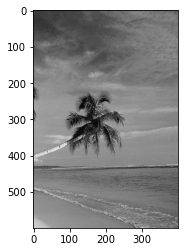

In [168]:
plt.imshow(inputImage,cmap=plt.cm.gray)

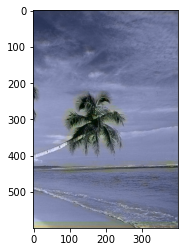

In [169]:
plt.imshow(outputImage)